<a href="https://colab.research.google.com/github/anubrata01/Data-mining-college-Assignment/blob/main/Temperature_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("samithsachidanandan/average-monthly-surface-temperature-1940-2024")

print("Path to dataset files:", path)

100%|██████████| 1.58M/1.58M [00:00<00:00, 108MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/samithsachidanandan/average-monthly-surface-temperature-1940-2024/versions/1


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [3]:
df = pd.read_csv("/root/.cache/kagglehub/datasets/samithsachidanandan/average-monthly-surface-temperature-1940-2024/versions/1/average-monthly-surface-temperature.csv")

In [4]:
df.head()

,Entity,Code,year,Day,Average surface temperature,Average surface temperature.1
0,Afghanistan,AFG,1940,1940-01-15,-2.032494,11.327695
1,Afghanistan,AFG,1940,1940-02-15,-0.733503,11.327695
2,Afghanistan,AFG,1940,1940-03-15,1.999134,11.327695
3,Afghanistan,AFG,1940,1940-04-15,10.199754,11.327695
4,Afghanistan,AFG,1940,1940-05-15,17.942135,11.327695


In [5]:
df.shape

(198900, 6)

### Basic Exploration

In [7]:
df['Entity'].nunique()

195

In [8]:
df['Code'].nunique()

195

In [9]:
df[df['Code']== "IND"]

,Entity,Code,year,Day,Average surface temperature,Average surface temperature.1
85680,India,IND,1940,1940-01-15,17.029053,23.243858
85681,India,IND,1940,1940-02-15,19.129791,23.243858
85682,India,IND,1940,1940-03-15,21.742670,23.243858
85683,India,IND,1940,1940-04-15,26.641914,23.243858
85684,India,IND,1940,1940-05-15,28.937290,23.243858
...,...,...,...,...,...,...
86695,India,IND,2024,2024-08-15,26.811690,24.738352
86696,India,IND,2024,2024-09-15,26.787462,24.738352
86697,India,IND,2024,2024-10-15,25.847150,24.738352
86698,India,IND,2024,2024-11-15,21.684020,24.738352


In [11]:
print(f"Year {df['year'].min()} to {df['year'].max()}")

Year1940 to 2024


In [14]:
df[df['Code']=="AFG"]['year'].value_counts()

,count
year,
1940,12
1994,12
2002,12
2001,12
2000,12
...,...
1967,12
1966,12
1965,12


In [15]:
df.head(13)

,Entity,Code,year,Day,Average surface temperature,Average surface temperature.1
0,Afghanistan,AFG,1940,1940-01-15,-2.032494,11.327695
1,Afghanistan,AFG,1940,1940-02-15,-0.733503,11.327695
2,Afghanistan,AFG,1940,1940-03-15,1.999134,11.327695
3,Afghanistan,AFG,1940,1940-04-15,10.199754,11.327695
4,Afghanistan,AFG,1940,1940-05-15,17.942135,11.327695
5,Afghanistan,AFG,1940,1940-06-15,23.203533,11.327695
6,Afghanistan,AFG,1940,1940-07-15,24.441550,11.327695
7,Afghanistan,AFG,1940,1940-08-15,22.058195,11.327695
8,Afghanistan,AFG,1940,1940-09-15,17.721355,11.327695
9,Afghanistan,AFG,1940,1940-10-15,13.730240,11.327695


In [17]:
df[df['Code']== "AFG"].shape

(1020, 6)

In [19]:
df.isnull().sum()

,0
Entity,0
Code,0
year,0
Day,0
Average surface temperature,0
Average surface temperature.1,0


In [20]:
df.duplicated().sum()

0

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198900 entries, 0 to 198899
Data columns (total 6 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Entity                         198900 non-null  object 
 1   Code                           198900 non-null  object 
 2   year                           198900 non-null  int64  
 3   Day                            198900 non-null  object 
 4   Average surface temperature    198900 non-null  float64
 5   Average surface temperature.1  198900 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.1+ MB


**Conclusion**
<br>
1. Each Country Have 1020 values
2. NO Null value present in the dataset
3. In day column only month is changing day is fixed as 15 . So need fature engineering
4. No Need for entity as we have code
5. Average surface temperature.1 represent monthly avg temp.
6. Have 195 different entities.
7. NO duplicate values present.

### Basic EDA

In [25]:
plt.figure(figsize=(20,10))

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

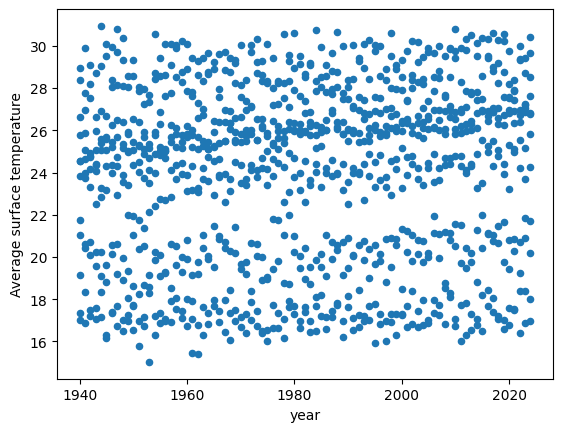

In [32]:
df[df['Code']== "IND"].plot.scatter(x="year",y="Average surface temperature")
plt.show()

In [29]:
df['year'].value_counts(sort=False)

,count
year,
1940,2340
1941,2340
1942,2340
1943,2340
1944,2340
...,...
2020,2340
2021,2340
2022,2340


Feature Engineering

In [35]:
df['month']=df['Day'].str.split('-',expand=True)[1]

In [36]:
df.head()

,Entity,Code,year,Day,Average surface temperature,Average surface temperature.1,month
0,Afghanistan,AFG,1940,1940-01-15,-2.032494,11.327695,01
1,Afghanistan,AFG,1940,1940-02-15,-0.733503,11.327695,02
2,Afghanistan,AFG,1940,1940-03-15,1.999134,11.327695,03
3,Afghanistan,AFG,1940,1940-04-15,10.199754,11.327695,04
4,Afghanistan,AFG,1940,1940-05-15,17.942135,11.327695,05


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198900 entries, 0 to 198899
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Entity                         198900 non-null  object 
 1   Code                           198900 non-null  object 
 2   year                           198900 non-null  int64  
 3   Day                            198900 non-null  object 
 4   Average surface temperature    198900 non-null  float64
 5   Average surface temperature.1  198900 non-null  float64
 6   month                          198900 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 10.6+ MB


In [42]:
df['month'] = df['month'].astype(int)

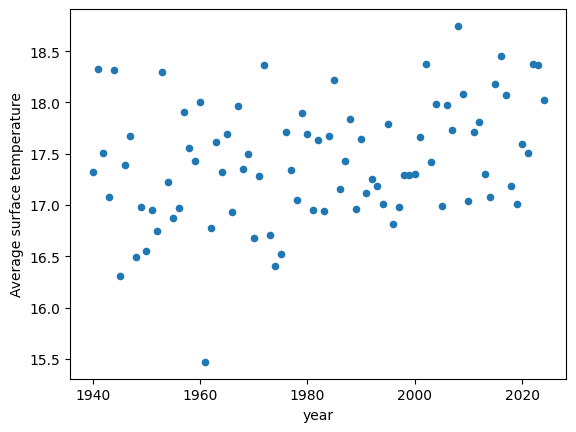

In [52]:
df[(df['Code']== "IND") & (df['month']==12)].plot.scatter(x="year",y="Average surface temperature")
plt.show()

In [46]:
df[(df['Code']== "IND") & (df['month']==12)]

,Entity,Code,year,Day,Average surface temperature,Average surface temperature.1,month
85691,India,IND,1940,1940-12-15,17.320310,23.243858,12
85703,India,IND,1941,1941-12-15,18.325230,23.678528,12
85715,India,IND,1942,1942-12-15,17.502924,23.517593,12
85727,India,IND,1943,1943-12-15,17.075102,23.015299,12
85739,India,IND,1944,1944-12-15,18.316729,23.651045,12
...,...,...,...,...,...,...,...
86651,India,IND,2020,2020-12-15,17.593490,24.162790,12
86663,India,IND,2021,2021-12-15,17.502928,24.260620,12
86675,India,IND,2022,2022-12-15,18.373375,24.436960,12
86687,India,IND,2023,2023-12-15,18.365587,24.442795,12


<Axes: ylabel='Density'>

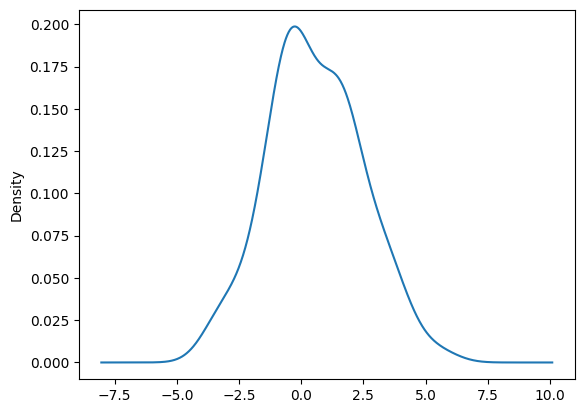

In [49]:
df[(df['Code']== "AFG") & (df['month']==12)]['Average surface temperature'].plot(kind="kde")

<Axes: ylabel='Density'>

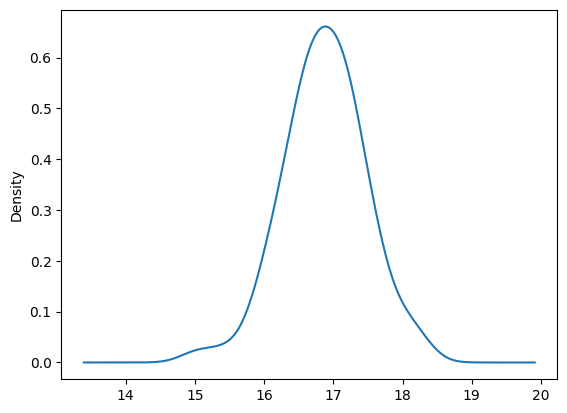

In [51]:
df[(df['Code']== "IND") & (df['month']==1)]['Average surface temperature'].plot(kind="kde")